In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE


In [ ]:

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Flatten and standardize images
X_train = train_dataset.data.numpy().reshape((len(train_dataset), -1))
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape((len(test_dataset), -1))
y_test = test_dataset.targets.numpy()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:10<00:00, 906kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 137kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.07MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



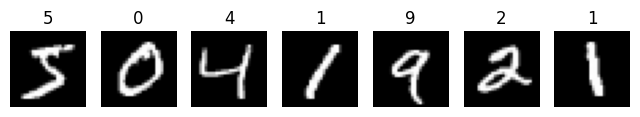

In [ ]:

# Display sample images
fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axs[i].set_title(y_train[i])
    axs[i].axis('off')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.9735


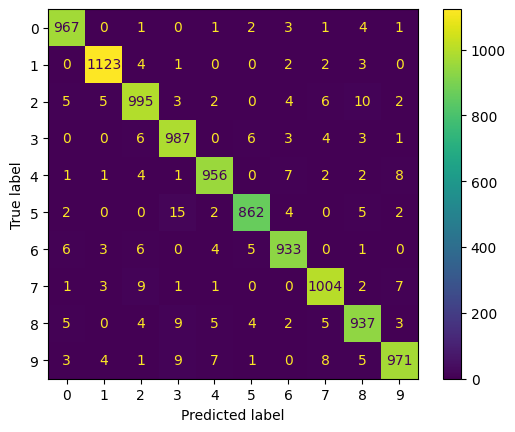

In [ ]:
# Train and evaluate MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_mlp), display_labels=[i for i in range(10)]).plot()
plt.show()



RF Accuracy: 0.9705


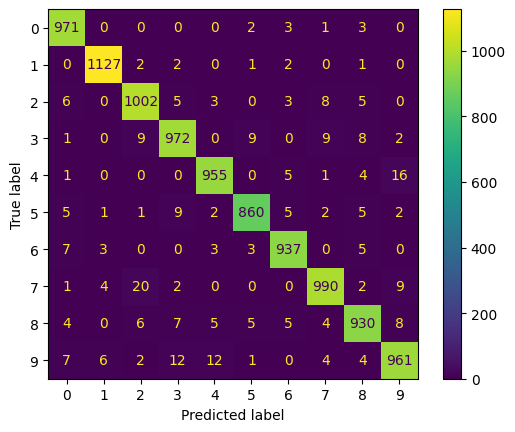

In [ ]:

# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"RF Accuracy: {accuracy_score(y_test, y_pred_rf)}")
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=[i for i in range(10)]).plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.92


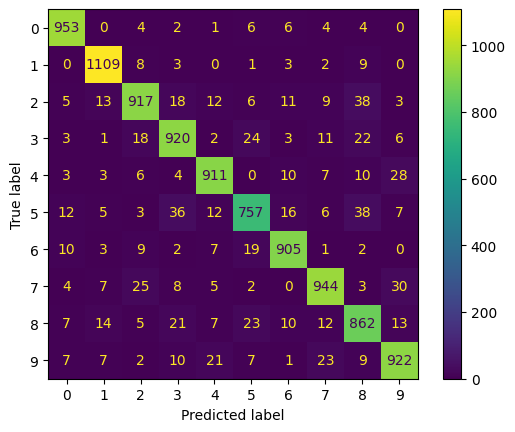

In [ ]:

# Train and evaluate Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"LR Accuracy: {accuracy_score(y_test, y_pred_lr)}")
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr), display_labels=[i for i in range(10)]).plot()
plt.show()



In [ ]:
# Print F1 scores
print(f"MLP F1 Score: {f1_mlp}, RF F1 Score: {f1_rf}, LR F1 Score: {f1_lr}")

MLP F1 Score: 0.9734910105932999, RF F1 Score: 0.9704722695987773, LR F1 Score: 0.919806134173573


In [ ]:
# Define PyTorch MLP model for t-SNE visualization
import torch.nn as nn
import torch.optim as optim

class MLP_30_20(nn.Module):
    def __init__(self):
        super(MLP_30_20, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x_20 = torch.relu(self.fc2(x))
        x = self.fc3(x_20)
        return x, x_20

model_30_20 = MLP_30_20()
optimizer = optim.Adam(model_30_20.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Train the MLP
n_epochs = 5
for epoch in range(n_epochs):
    model_30_20.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs, _ = model_30_20(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader)}')

# Extract t-SNE embeddings for the trained model
model_30_20.eval()
activations_trained, labels_trained = [], []
with torch.no_grad():
    for images, labels in torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64):
        _, layer2_output = model_30_20(images)
        activations_trained.append(layer2_output.numpy())
        labels_trained.append(labels.numpy())
activations_trained = np.concatenate(activations_trained)
labels_trained = np.concatenate(labels_trained)


Epoch 1/5, Loss: 0.5085213712172341
Epoch 2/5, Loss: 0.22898761882408977
Epoch 3/5, Loss: 0.18836478256126013
Epoch 4/5, Loss: 0.1653540909453146
Epoch 5/5, Loss: 0.1474151766733892


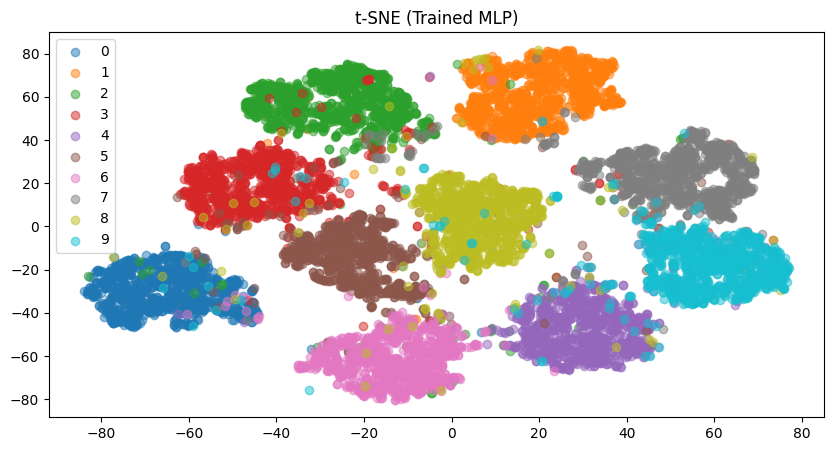

In [ ]:
# t-SNE for the trained model
tsne_trained = TSNE(n_components=2, random_state=42).fit_transform(activations_trained)
plt.figure(figsize=(10, 5))
for digit in range(10):
    indices = labels_trained == digit
    plt.scatter(tsne_trained[indices, 0], tsne_trained[indices, 1], label=str(digit), alpha=0.5)
plt.legend()
plt.title("t-SNE (Trained MLP)")
plt.show()


In [ ]:
# t-SNE for Fashion-MNIST
fashion_mnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_test_loader = torch.utils.data.DataLoader(dataset=fashion_mnist_test, batch_size=64, shuffle=False)
activations_fashion, labels_fashion = [], []
with torch.no_grad():
    for images, labels in fashion_test_loader:
        _, layer2_output = model_30_20(images)
        activations_fashion.append(layer2_output.numpy())
        labels_fashion.append(labels.numpy())
activations_fashion = np.concatenate(activations_fashion)
labels_fashion = np.concatenate(labels_fashion)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.43MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 170kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.22MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.65MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



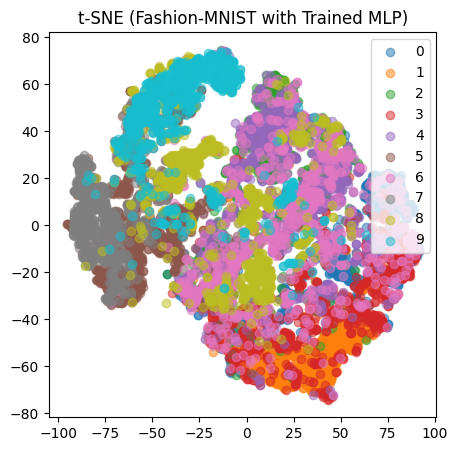

In [ ]:
# t-SNE for Fashion-MNIST
tsne_fashion = TSNE(n_components=2, random_state=42).fit_transform(activations_fashion)
plt.figure(figsize=(5, 5))
for label in range(10):
    indices = labels_fashion == label
    plt.scatter(tsne_fashion[indices, 0], tsne_fashion[indices, 1], label=str(label), alpha=0.5)
plt.legend()
plt.title("t-SNE (Fashion-MNIST with Trained MLP)")
plt.show()

In [ ]:
# Evaluation on Fashion-MNIST Test Data
model.eval()

y_true_fashion, y_pred_fashion = [], []
with torch.no_grad():
    for images, labels in fashion_test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        output = model(images)
        _, predicted = torch.max(output, 1)
        y_true_fashion.extend(labels.cpu().numpy())
        y_pred_fashion.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(y_true_fashion, y_pred_fashion)
print(f"Test Accuracy on Fashion-MNIST: {accuracy:.4f}")

# Optional: Calculate F1-Score
f1 = f1_score(y_true_fashion, y_pred_fashion, average="weighted")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix for Fashion-MNIST
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(y_true_fashion, y_pred_fashion)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Fashion-MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'model' is not defined